# Examples using the SQL data source

In [1]:
%pylab inline
from config import db
from itertools import groupby

Populating the interactive namespace from numpy and matplotlib


## ICD Groups

* http://apps.who.int/classifications/icd10/browse/2016/en

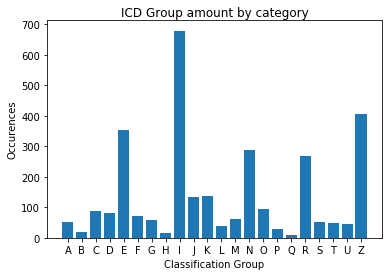

In [2]:
c = db.cursor()
c.execute('''
    SELECT DISTINCT char, count(char)
    FROM (
        SELECT upper(substr(icd_3stellig,1,1)) as char 
        FROM icd
    )
    GROUP BY char
    ORDER BY char
''')
data = c.fetchall()
bar(range(len(data)), [row[1] for row in data])
ylabel('Occurences')
xlabel('Classification Group')
xticks(np.arange(len(data)) + .4, (row[0] for row in data))
title('ICD Group amount by category');

### Top 10 diseases in the biggest group

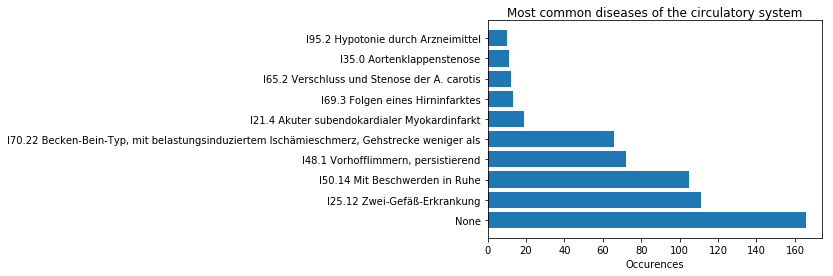

In [3]:
c = db.cursor()
c.execute('''
    SELECT DISTINCT icd_3stellig, icd_klarname, count(icd_3stellig)
    FROM icd
    WHERE lower(substr(icd_3stellig,1,1)) = 'i'
    GROUP BY icd_3stellig
    ORDER BY count(icd_3stellig) DESC
    LIMIT 10
''')
data = c.fetchall()
barh(range(len(data)), [row[2] for row in data], align='center')
yticks(range(len(data)), (row[1] for row in data))
xlabel('Occurences')
title('Most common diseases of the circulatory system');

### Specific ICD group example
Pregnancy related stuff has an ICD starting with 'O'.

* http://apps.who.int/classifications/icd10/browse/2016/en#/XV


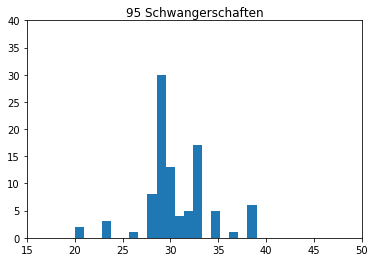

In [4]:
c = db.cursor()
c.execute('''
    SELECT alter_in_jahren_am_aufnahmetag 
    FROM records LEFT OUTER JOIN icd USING (pat_neu)
    WHERE lower(substr(icd_3stellig,1,1)) = 'o'
    ORDER BY alter_in_jahren_am_aufnahmetag
''')
data = c.fetchall()
hist([row[0] for row in data], 20)
title('{} Schwangerschaften'.format(len(data)))
axis([15, 50, 0, 40]);